# Transit photometry and RV

In this notebook, we simulate a Sun-like star hosting a Jupiter-like planet, and compute the expected transit light curve and RV time series (standard QS FTS CCF).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from SOAP.visualizer import plot_absorption_map
from SOAP.utils import transit_durations
import SOAP
from IPython.display import HTML

In [2]:
# Star-like star, rigid rotation
radius=1                # Stellar radius [solar radii]
mass=1                  # Stellar mass [solar masses]
prot=24.47              # Stellar rotation period [days]
incl=45                 # Stellar inclination [degrees] -> 90 is equator-on, 0 is pole-on
logg= 4.4               # Stellar surface gravity [cgs]
feh= 0.00               # Stellar metallicity [dex]
Teff=5777               # Stellar effective temperature [K]
ldcn=[[0.5,0.16]]       # Linear and quadratic limb-darkening coefficients
start_psi=0.0           # Starting phase of the star

# Mock jupiter-like planet close to the star
Pp=3                    # Orbital period [days]
e=0.0                   # Orbital eccentricity
w=90.0                  # Argument of periastron [degrees]
ip=90                   # Orbital inclination [degrees]
lbda=0                  # Sky-projected spin-orbit misalignement [degrees]
a=9                     # Semi-major axis [stellar radii]
Rp=0.15                 # Planetary radius [stellar radii]
Mp=317.8                # Planetary mass [Earth masses]

# Observational parameters
λ =[5882, 5902]         # Wavelength range [Angstrom]
Res=140000              # Instrumental resolution

# Start the simulation

In [3]:
sim = SOAP.Simulation(wlll=(λ[1]+λ[0])/2, inst_reso=Res, grid=600, active_regions=[], ring=None)

In [4]:
# Set the properties of the star and planet
sim.star.set(prot=prot,incl=incl,u1=ldcn[0][0],u2= ldcn[0][1], start_psi=start_psi,radius=radius,mass=mass,teff=Teff)
sim.planet.set(P=Pp,t0=start_psi,e=e,w=w,ip=ip,lbda=lbda,a=a,Rp=Rp,Mp=Mp)

In [5]:
# Provide the range of stellar phases to simulate
psi = np.linspace(-0.1,0.1,50) / sim.star.prot

In [6]:
# Calculate the transit signal
out=sim.calculate_signal(psi, renormalize_rv=True)

In [7]:
tr_dur,tr_ingress_egress=transit_durations(sim)
tr_dur*=sim.planet.P.value*24  # in hours
tr_ingress_egress*=sim.planet.P.value*24  # in hours

# Plot the results

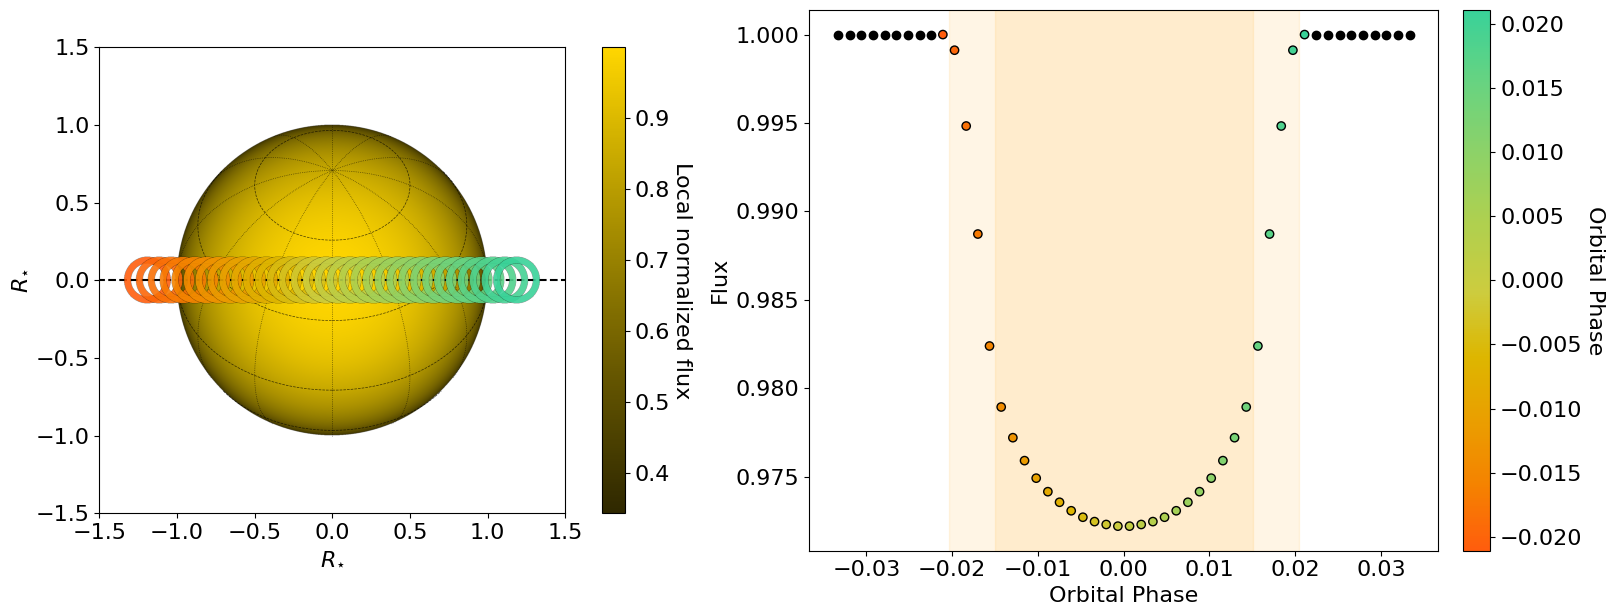

In [10]:
sim.visualize(
    output=out,
    plot_type="flux",
)

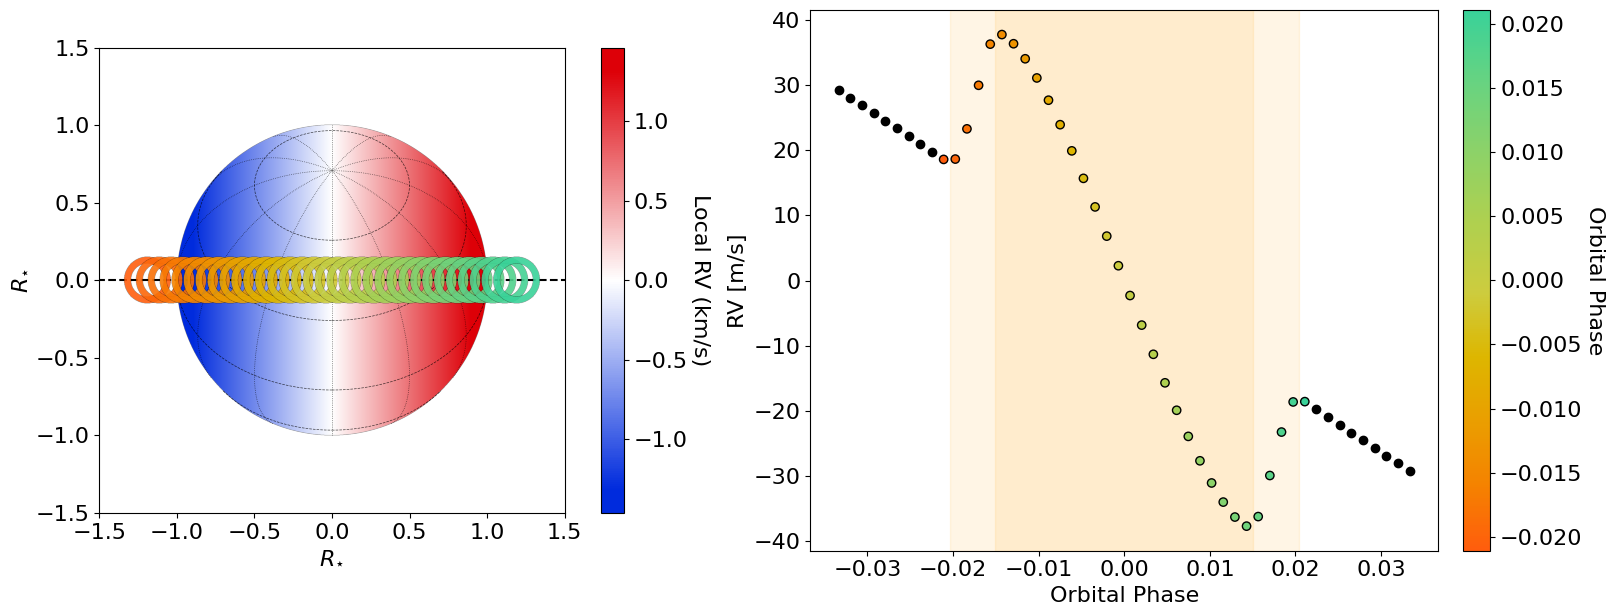

In [12]:
sim.visualize(
    output=out,
    plot_type="rv"
)